#                       Task-1

---








# Movie Genre classification

In [ ]:
# import libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [ ]:
train_path='/content/drive/MyDrive/Codsoft/Movie Genre Classification/train_data.txt'
train_df=pd.read_csv(train_path,sep=':::', names=["TITLE","GENRE","DESCRIPTION"],engine='python')
train_df.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_path='/content/drive/MyDrive/Codsoft/Movie Genre Classification/test_data_solution.txt'
test_df=pd.read_csv(test_path,sep=":::", names=['TITLE','GENRE','DESCRIPTION'], engine='python')
test_df.head()

,TITLE,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_df.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54200 non-null  object
 1   GENRE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
test_df.describe()

,TITLE,GENRE,DESCRIPTION
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [ ]:
test_df.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

# EDA

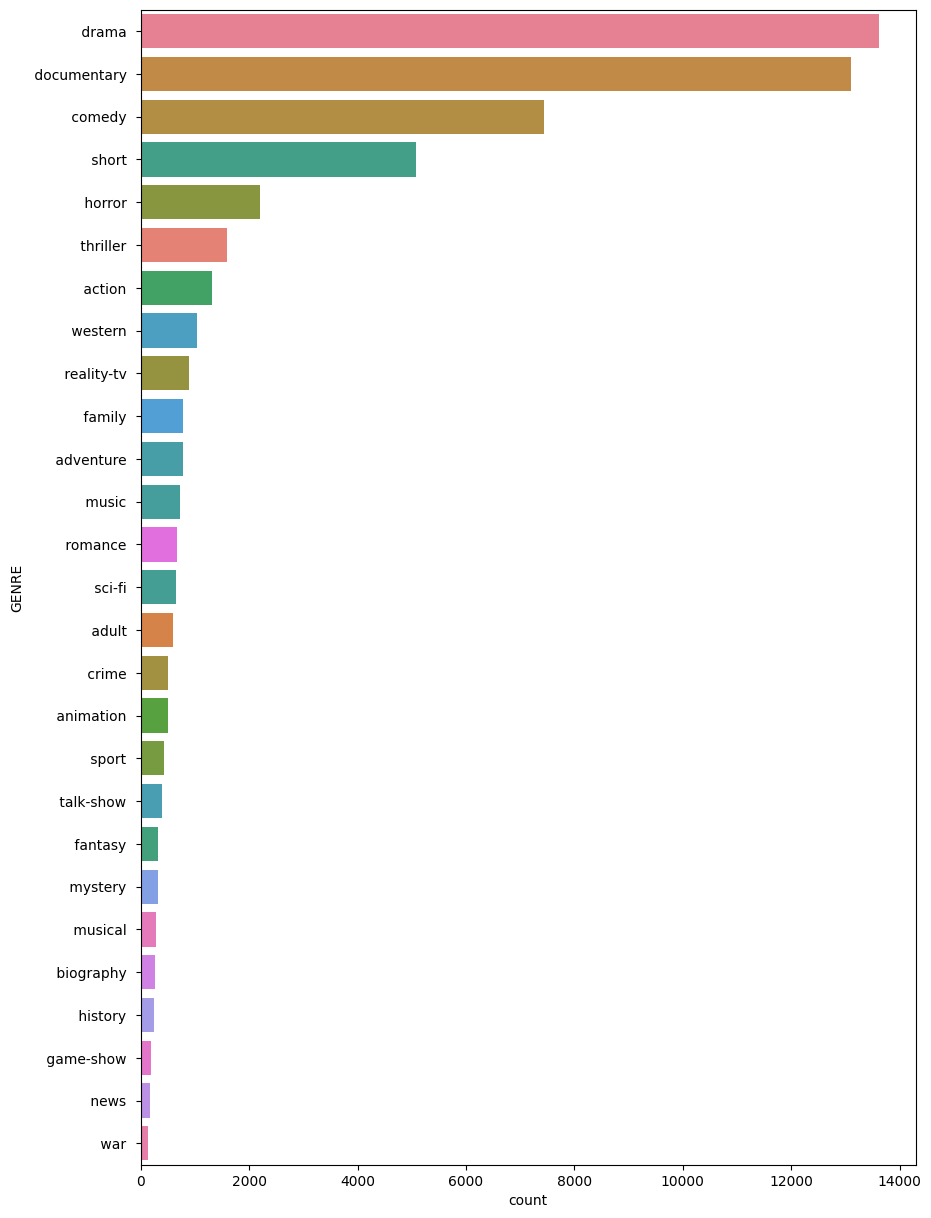

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_df,hue='GENRE',legend=False, y='GENRE',order=train_df['GENRE'].value_counts().index)
plt.show()

## Data Preprocessing

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_df['TextCleaning']=train_df['DESCRIPTION'].apply(cleaning_data)
test_df['TextCleaning']=test_df['DESCRIPTION'].apply(cleaning_data)

In [ ]:
train_df

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


## Using TF-Idf to vectorize the data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize=TfidfVectorizer()
X_train=vectorize.fit_transform(train_df['TextCleaning'])
X_test=vectorize.transform(test_df['TextCleaning'])

In [ ]:
X_train

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

## Split data into train and validation dataset

In [ ]:
X=X_train
y=train_df['GENRE']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.4, random_state=42)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((32528, 116601), (21686, 116601), (32528,), (21686,))

## Train the model

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
model.score(X_train,y_train)

0.9046052631578947

In [ ]:
y_pred=model.predict(X_valid)

## Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_valid)
print("Validation accuracy",accuracy)

Validation accuracy 0.55390574564235


## Testing the model

In [ ]:
y_test=test_df['GENRE']

In [ ]:
prediction=model.predict(X_test)
print("Testing accuracy: ",accuracy_score(prediction,y_test))

Testing accuracy:  0.556660516605166


**End of the model**